In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-f6d1a/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/srv/dask/lib', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/sit

In [3]:
run_tables = False

labels_signals = ["Elastic", "SingleDissociation"]

fileNames_signals = {
    'Elastic': [ 'output-MC2017-Elastic-Non3+3-PreSel.h5' ],
    'SingleDissociation': [ 'output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5' ]
    }

df_counts_signals = {}
df_signals = {}

for label in labels_signals:
    if run_tables:
        with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

            df_counts_signal_, df_signal_ = get_data( fileNames_signals[ label ] )
#             df_signal_ = process_data( df_signal_, proton_selection, min_mass = 110. )

            store_[ "counts" ] = df_counts_signal_
            store_[ "df" ] = df_signal_

    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_signals[ label ] = store_[ "counts" ]
        df_signals[ label ] = store_[ "df" ]
        

In [4]:
df_counts_signals

{'Elastic': All        178402
 Muon       166756
 Vertex     149608
 Protons     91429
 dtype: int64,
 'SingleDissociation': All        178174
 Muon       169697
 Vertex     158616
 Protons     56625
 dtype: int64}

In [6]:
df_signals[ 'Elastic' ].columns

Index(['Run', 'LumiSection', 'EventNum', 'Slice', 'CrossingAngle', 'MultiRP',
       'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
       'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP',
       'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
       'TrackPixShift_SingleRP', 'Track1PixShift_MultiRP',
       'Track2PixShift_MultiRP', 'Xi', 'T', 'ThX', 'ThY', 'Time', 'nVertices',
       'PrimVertexZ', 'Muon0Pt', 'Muon0Eta', 'Muon0Phi', 'Muon0VtxZ',
       'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ', 'InvMass',
       'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus', 'XiMuMu', 'xlow',
       'xhigh', 'ylow', 'yhigh'],
      dtype='object')

In [13]:
norm_factors = {}
norm_factors['Elastic'] = np.array( [ ( 1. / ( 200000 ) ), 0.017254036*1000, 0.89 ] )
norm_factors['SingleDissociation'] = np.array( [ ( 1. / ( 200000 ) ), 0.025643100*1000, 0.76 ] )
for label in labels_signals:
    df_signals[ label ]["norm"] = np.product( norm_factors[ label ] )
    print ( df_signals[ label ]["norm"] )

3         0.000077
6         0.000077
16        0.000077
19        0.000077
24        0.000077
            ...   
213516    0.000077
213519    0.000077
213527    0.000077
213530    0.000077
213533    0.000077
Name: norm, Length: 48051, dtype: float64
8         0.000097
12        0.000097
21        0.000097
24        0.000097
28        0.000097
            ...   
132013    0.000097
132016    0.000097
132021    0.000097
132025    0.000097
132028    0.000097
Name: norm, Length: 30593, dtype: float64


(array([0.08575053, 0.05018355, 0.02816125, 0.01676033, 0.0093546 ]),
 array([ 500.,  600.,  700.,  800.,  900., 1000.], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fe6ff37dc40>])

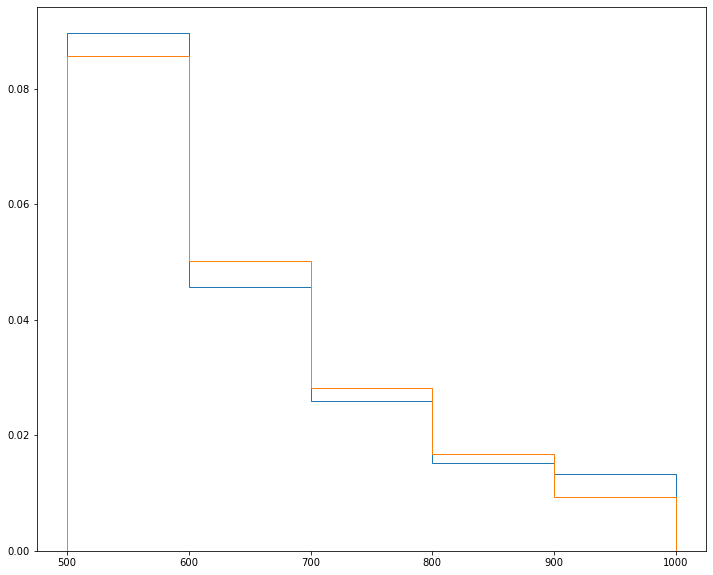

In [27]:
fig = plt.figure( figsize=(12,10) )
bins_ = 5
range_ = (500,1000)
plt.hist( df_signals[ 'Elastic' ]["InvMass"], weights=df_signals[ 'Elastic' ]["norm"], histtype='step', bins=bins_, range=range_ )
plt.hist( df_signals[ 'SingleDissociation' ]["InvMass"], weights=df_signals[ 'SingleDissociation' ]["norm"], histtype='step', bins=bins_, range=range_ )
# plt.yscale( "log" )

(array([0.95618789, 1.09848385, 1.08193596, 1.09692967, 0.7002053 ]),
 array([ 500.,  600.,  700.,  800.,  900., 1000.], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7fe6ff354b80>])

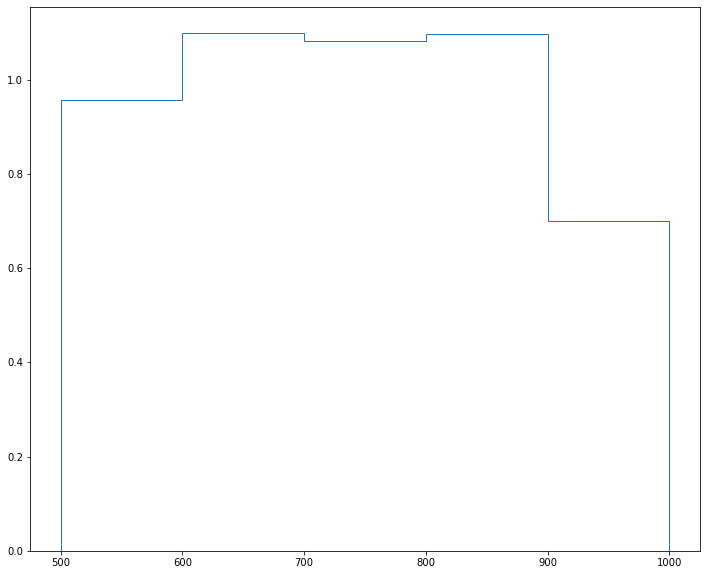

In [28]:
fig = plt.figure( figsize=(12,10) )
bins_ = 5
range_ = (500,1000)
sum_weights_Elastic, bin_edges_ =  np.histogram( df_signals[ 'Elastic' ]["InvMass"], weights=df_signals[ 'Elastic' ]["norm"], bins=bins_, range=range_ )
sum_weights_SingleDissociation, bin_edges_ =  np.histogram( df_signals[ 'SingleDissociation' ]["InvMass"], weights=df_signals[ 'SingleDissociation' ]["norm"], bins=bins_, range=range_ )
bin_centers_ = ( bin_edges_[:-1] + bin_edges_[1:] ) / 2.
plt.hist( bin_centers_, weights=( sum_weights_SingleDissociation / sum_weights_Elastic ), histtype='step', bins=bins_, range=range_ )